<a href="https://colab.research.google.com/github/Harshil1450/Harshil/blob/main/DT_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **1. What is a Decision Tree, and how does it work?**  
A **Decision Tree** is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively splitting the data into subsets based on feature values, forming a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome, and each leaf node represents a final class label or a continuous value.

---

### **2. What are impurity measures in Decision Trees?**  
Impurity measures determine how "mixed" the classes in a dataset are at a given node. The goal of a Decision Tree is to minimize impurity at each split. Common impurity measures include:  
- **Gini Impurity** (used in CART algorithm)  
- **Entropy** (used in ID3 and C4.5 algorithms)  

---

### **3. What is the mathematical formula for Gini Impurity?**  
The Gini Impurity for a node is calculated as:  
\[
Gini = 1 - \sum_{i=1}^{C} p_i^2
\]  
where:  
- \( C \) is the number of classes  
- \( p_i \) is the proportion of samples in class \( i \)  

---

### **4. What is the mathematical formula for Entropy?**  
Entropy is defined as:  
\[
Entropy = -\sum_{i=1}^{C} p_i \log_2 p_i
\]  
where \( p_i \) is the probability of class \( i \). Higher entropy means higher impurity.

---

### **5. What is Information Gain, and how is it used in Decision Trees?**  
**Information Gain (IG)** measures the reduction in entropy after a dataset is split on a feature. It is defined as:  
\[
IG = Entropy(parent) - \sum_{j=1}^{k} \frac{N_j}{N} Entropy(j)
\]  
where:  
- \( N_j \) is the number of samples in subset \( j \)  
- \( N \) is the total number of samples  
- \( Entropy(j) \) is the entropy of subset \( j \)  

A feature with higher Information Gain is preferred for splitting.

---

### **6. What is the difference between Gini Impurity and Entropy?**  
| Feature | Gini Impurity | Entropy |
|---------|--------------|---------|
| Formula | \( 1 - \sum p_i^2 \) | \( -\sum p_i \log_2 p_i \) |
| Range | [0, 0.5] for binary classification | [0, 1] for binary classification |
| Calculation Speed | Faster (no logarithm) | Slower (involves logarithm) |
| Bias | Tends to favor larger partitions | More balanced |

---

### **7. What is the mathematical explanation behind Decision Trees?**  
Decision Trees use **recursive binary splitting** to maximize Information Gain (or minimize Gini Impurity). The mathematical foundation involves:  
1. **Selecting the best split** by evaluating impurity reduction.  
2. **Using a greedy approach** (locally optimal choices at each step).  
3. **Constructing the tree** until a stopping condition is met (e.g., all nodes are pure or max depth is reached).  

---

### **8. What is Pre-Pruning in Decision Trees?**  
**Pre-Pruning** stops the tree from growing before it becomes too complex. Common techniques:  
- **Max depth**: Limits the depth of the tree.  
- **Min samples split**: Requires a minimum number of samples for a split.  
- **Min samples leaf**: Ensures leaf nodes have enough samples.  

---

### **9. What is Post-Pruning in Decision Trees?**  
**Post-Pruning** allows the tree to grow fully and then removes unnecessary branches. Techniques include:  
- **Cost Complexity Pruning (CCP)**: Penalizes complex trees using a regularization term.  
- **Reduced Error Pruning**: Prunes nodes that do not improve accuracy on validation data.  

---

### **10. What is the difference between Pre-Pruning and Post-Pruning?**  
| Feature | Pre-Pruning | Post-Pruning |
|---------|------------|-------------|
| When Applied | Before tree grows fully | After tree is fully grown |
| Control | Uses heuristics like depth or samples per node | Uses validation data to remove branches |
| Risk | May stop before finding the best structure | More computationally expensive but optimal |

---

### **11. What is a Decision Tree Regressor?**  
A **Decision Tree Regressor** predicts continuous values instead of discrete labels. It works by splitting data to minimize variance instead of impurity. The predicted value at a leaf node is the mean (or sometimes median) of the samples in that node.

---

### **12. What are the advantages and disadvantages of Decision Trees?**  
#### **Advantages**  
✅ Easy to interpret and visualize  
✅ Works well with both numerical and categorical data  
✅ No need for feature scaling (e.g., normalization)  
✅ Can handle missing values  

#### **Disadvantages**  
❌ Prone to overfitting (without pruning)  
❌ Can create biased trees if classes are imbalanced  
❌ Sensitive to small data variations (high variance)  

---

### **13. How does a Decision Tree handle missing values?**  
- **Ignoring missing values**: Some algorithms skip missing values during splits.  
- **Surrogate splits**: If the best feature is missing, the tree uses the next best alternative.  
- **Imputation**: Missing values can be replaced with the most frequent or median value.  

---

### **14. How does a Decision Tree handle categorical features?**  
Decision Trees handle categorical data by:  
1. **One-hot encoding** (expanding categorical features into binary columns).  
2. **Using categorical splits** (e.g., grouping categories together).  
3. **Using label encoding** (converting categories into numerical values, though it can introduce bias).  

---

### **15. What are some real-world applications of Decision Trees?**  
🌍 **Healthcare**: Diagnosing diseases, predicting patient readmission.  
📈 **Finance**: Credit risk assessment, fraud detection.  
🛒 **Retail**: Customer segmentation, recommendation systems.  
🚗 **Automotive**: Predictive maintenance, self-driving decision-making.  
📝 **Natural Language Processing**: Sentiment analysis, spam filtering.  

---

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [85]:
from sklearn.datasets import load_iris


In [86]:
data=load_iris()

In [87]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [88]:
X=df
y=data.target


In [89]:
#Q-16>>>
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.56%


In [90]:
#Q-17>>>>
#by using above same dataset
clff=DecisionTreeClassifier(criterion='gini')
clff.fit(X_train,y_train)
y_pred=clff.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"The accuracy score is:",accuracy*100)
fearture_importances=clff.feature_importances_
print(f"The feature importances are:",fearture_importances)

The accuracy score is: 95.55555555555556
The feature importances are: [0.02146947 0.02146947 0.57196476 0.38509631]


In [91]:
#Q-18>>
#by using above same dataset
clfa = DecisionTreeClassifier(criterion='entropy')
clfa.fit(X_train, y_train)
y_pred = clfa.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using entropy criterion is : {accuracy * 100:.2f}%")

Accuracy using entropy criterion is : 95.56%


In [92]:
#Q-19>>
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
X=df
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"The mean squared error is:",mse*100)

The mean squared error is: 49.31857768871446


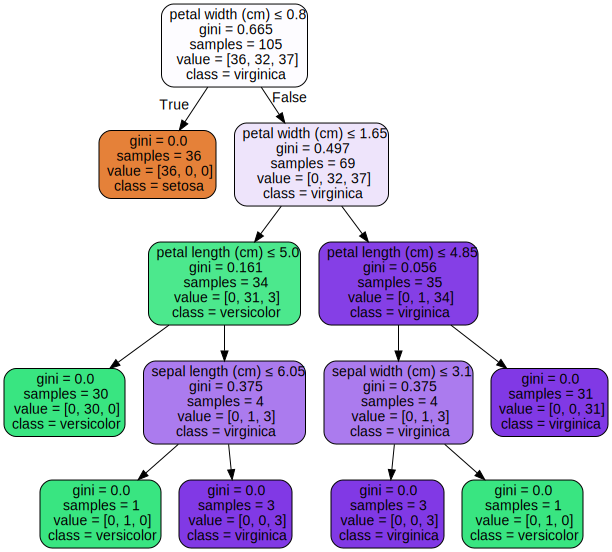

In [93]:
#Q-20>>
import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
X=df
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
graph_data=export_graphviz(classifier,out_file=None,feature_names=data.feature_names,class_names=data.target_names,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(graph_data)
graph

In [94]:
#Q-21>>>
#by using above same dataset.
clfc=DecisionTreeClassifier(max_depth=3)
clfc.fit(X_train,y_train)
y_pred=clfc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"The accuracy score for max depth 3 tree is:",accuracy*100)
#full model accuracy is
clfa.fit(X_train,y_train)
y_pred=clfa.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"The accuracy score for full tree is :",accuracy*100)

The accuracy score for max depth 3 tree is: 95.55555555555556
The accuracy score for full tree is : 95.55555555555556


In [95]:
#Q-22>>>
#by using above same dataset.
clfd=DecisionTreeClassifier(min_samples_split=5,random_state =  1)
clfd.fit(X_train,y_train)
y_pred=clfd.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"The accuracy score for min samples split 5 is:",accuracy*100)
clfa.fit(X_train,y_train)
y_pred=clfa.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"The accuracy score for default tree is :",accuracy*100)

The accuracy score for min samples split 5 is: 95.55555555555556
The accuracy score for default tree is : 95.55555555555556


In [96]:
#Q-23>>
#by using above same dataset.
from sklearn.preprocessing import StandardScaler
clf_unscaled = DecisionTreeClassifier(random_state=1)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = DecisionTreeClassifier(random_state=1)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with unscaled data: {accuracy_unscaled * 100:.2f}%")
print(f"Accuracy with scaled data: {accuracy_scaled * 100:.2f}%")

Accuracy with unscaled data: 95.56%
Accuracy with scaled data: 95.56%


In [97]:
#Q-24>>
#by using above same daataset
from sklearn.multiclass import OneVsRestClassifier
classifier = DecisionTreeClassifier(random_state=1)
ovr_clf = OneVsRestClassifier(classifier)
ovr_clf.fit(X_train, y_train)
y_pred = ovr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.56%


In [98]:
#Q-25>>
#By using above same dataset.
cl = DecisionTreeClassifier(random_state=1)
cl.fit(X_train, y_train)
y_pred = cl.predict(X_test)
feature_importances = cl.feature_importances_
print(f"Feature importances: {feature_importances}")

Feature importances: [0.02146947 0.02146947 0.06316954 0.89389153]


In [104]:
#Q-26>>import pandas as pd
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
reg1 = DecisionTreeRegressor(max_depth=5)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
mse_depth_5 = mean_squared_error(y_test, y_pred)
reg2 = DecisionTreeRegressor()
reg2.fit(X_train, y_train)
y_pred1 = reg2.predict(X_test)
mse_unrestricted = mean_squared_error(y_test, y_pred1)
print(f"Mean Squared Error with max_depth=5: {mse_depth_5:.4f}")
print(f"Mean Squared Error with unrestricted tree: {mse_unrestricted:.4f}")

Mean Squared Error with max_depth=5: 0.4976
Mean Squared Error with unrestricted tree: 0.5029


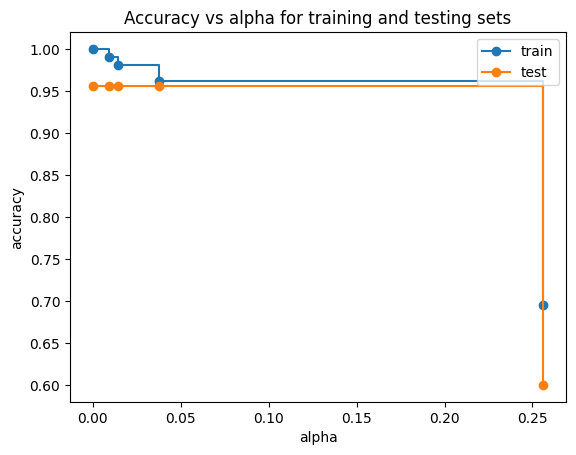

Final accuracy with ccp_alpha=0.0000: 95.56%


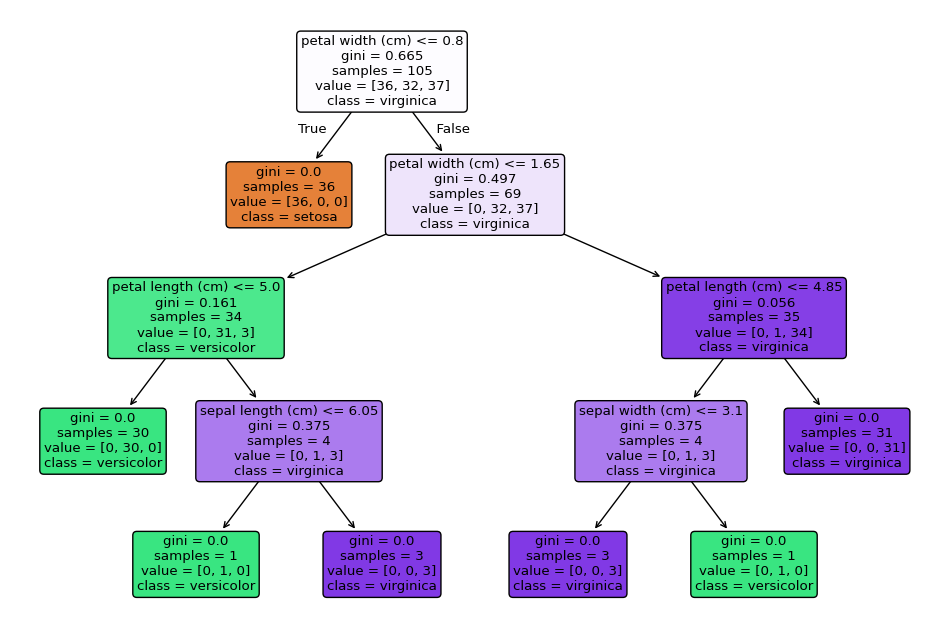

In [105]:
#Q=27>>
from sklearn.tree import plot_tree
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Determine the effective alphas for cost complexity pruning
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Remove the maximum ccp_alpha, as it prunes all but the root node
ccp_alphas = ccp_alphas[:-1]

# Train and evaluate decision trees with different ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate training and testing accuracies
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Visualize the effect of ccp_alpha on accuracy
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Select the best ccp_alpha (example: based on highest test accuracy)
best_alpha_index = test_scores.index(max(test_scores))
best_ccp_alpha = ccp_alphas[best_alpha_index]

# Train the final model with the best ccp_alpha
final_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp_alpha)
final_clf.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, final_clf.predict(X_test))
print(f"Final accuracy with ccp_alpha={best_ccp_alpha:.4f}: {final_accuracy * 100:.2f}%")

# Visualize the final pruned tree
plt.figure(figsize=(12, 8))
plot_tree(final_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

In [106]:
#Q-28>>
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9556
Recall: 0.9556
F1-Score: 0.9556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



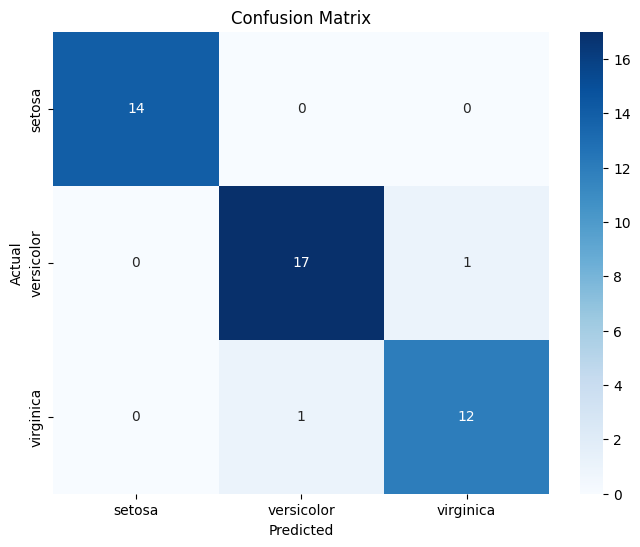

In [109]:
#Q-29>>
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [113]:
#Q=30>>
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [None, 10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid = params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}